# Load raster data via WMS

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          482b4d39-ee5e-431b-a431-f76765758356

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "dataset": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

8df9b0e6-e4b4-586e-90a3-6cf0f08c4e62

## Query raster via WMS

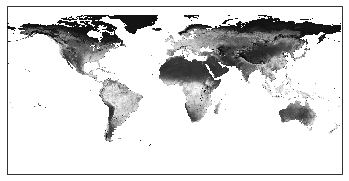

In [5]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.plot_image(
    ge.Bbox(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        )
);

## Query dataframe of point data

In [6]:
ports = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "OgrSource",
        "params": {
            "dataset": {
                "type": "internal",
                "datasetId": "a9623a5b-b6c5-404b-bc5a-313ff72e4e75"
            },
            "attributeProjection": None
        }
    }
})

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

df = ports.get_dataframe(
    ge.Bbox(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        )
)

df.head()

,scalerank,featurecla,name,website,natlscale,geometry,start,end
0,8,Port,Sint Nicolaas,www.rocargo.com/SanNicolas.html,5.0,POINT (-69.92356 12.43750),NaT,NaT
1,8,Port,Campana,www.consejoportuario.com.ar,5.0,POINT (-58.95141 -34.15333),NaT,NaT
2,8,Port,Zarate,www.consejoportuario.com.ar,5.0,POINT (-59.00495 -34.09889),NaT,NaT
3,8,Port,Puerto Belgrano/Bahia Blanca,None,5.0,POINT (-62.10088 -38.89444),NaT,NaT
4,8,Port,Puerto Galvan/Bahia Blanca,None,5.0,POINT (-62.30053 -38.78306),NaT,NaT


## Query whole world and combine with points

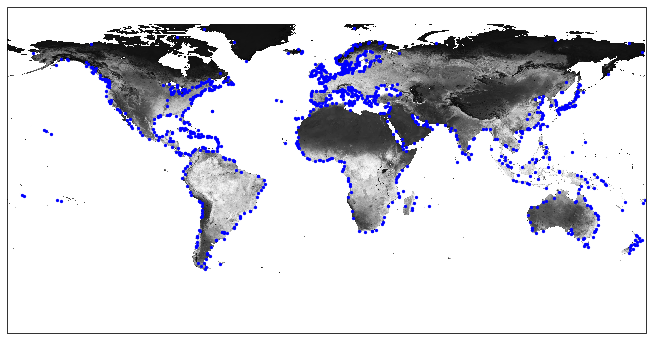

In [7]:
plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

ax = workflow.plot_image(
    ge.Bbox(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        ),
    ax=plt.gca()
)

df.plot(markersize=5, marker='o', color='blue', ax=ax)

plt.show()

## Query part of the world and combine with points

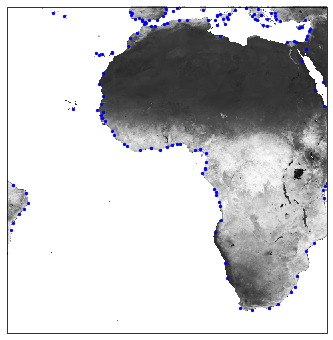

In [8]:
plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

ax = workflow.plot_image(
    ge.Bbox(
        [-40.0, -40.0, 40.0, 40.0],
        [time, time]
        ),
    ax=plt.gca()
)

df.plot(markersize=5, marker='o', color='blue', ax=ax)

plt.show()